In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=4e299bbce142259fb48123b12c1f9048a9e6a2a7bfac8c6ab3087ce0ba9ca8d7
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
#mount google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#necessory libraries
import pandas as pd
from pyspark.sql.functions import row_number,lit ,desc, monotonically_increasing_id
from pyspark.sql.functions import desc, row_number, monotonically_increasing_id
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField,IntegerType, StringType , DateType,FloatType

In [10]:
# May take a little while on a local computer
spark = SparkSession.builder.appName("Basics").getOrCreate()
#upload file here first
#df = pd.read_csv('/content/Colab Notebooks/Engineering_graduate_salary.csv')
#df = pd.read.csv('/content/Engineering_graduate_salary.csv', header=True, inferSchema=True)
#print('Path of file:', '/content/drive/My Drive/1a0zfwsYQYPN9I80RIEwHPDuWdlRKXxoO')
df = spark.read.csv('/content/drive/My Drive/Engineering_graduate_salary.csv', header=True, inferSchema=True)
df.show()
#you can direct copy the path of uploaded by clicking on right mouse buttong and copy path and paste here.
df.head()

+-------+------+----------+------------+--------------------+------------+------------+--------------------+---------+-----------+------------+--------------------+----------+-------------+---------------+--------------+--------------+-------+-------+-----+-----------------+-------------------+---------------------+---------------+--------------+--------------+-----------+---------+-----------------+-------------+------------+------------------+---------------------+------+
|     ID|Gender|       DOB|10percentage|             10board|12graduation|12percentage|             12board|CollegeID|CollegeTier|      Degree|      Specialization|collegeGPA|CollegeCityID|CollegeCityTier|  CollegeState|GraduationYear|English|Logical|Quant|           Domain|ComputerProgramming|ElectronicsAndSemicon|ComputerScience|MechanicalEngg|ElectricalEngg|TelecomEngg|CivilEngg|conscientiousness|agreeableness|extraversion|       nueroticism|openess_to_experience|Salary|
+-------+------+----------+------------+--

Row(ID=604399, Gender='f', DOB=datetime.date(1990, 10, 22), 10percentage=87.8, 10board='cbse', 12graduation=2009, 12percentage=84.0, 12board='cbse', CollegeID=6920, CollegeTier=1, Degree='B.Tech/B.E.', Specialization='instrumentation and control engineering', collegeGPA=73.82, CollegeCityID=6920, CollegeCityTier=1, CollegeState='Delhi', GraduationYear=2013, English=650, Logical=665, Quant=810, Domain=0.694479327708463, ComputerProgramming=485, ElectronicsAndSemicon=366, ComputerScience=-1, MechanicalEngg=-1, ElectricalEngg=-1, TelecomEngg=-1, CivilEngg=-1, conscientiousness=-0.159, agreeableness=0.3789, extraversion=1.2396, nueroticism=0.1459, openess_to_experience=0.2889, Salary=445000)

## Summary Statistics

In [11]:
summary=df.describe()
summary.show()

+-------+-----------------+------+------------------+--------------------+------------------+-----------------+--------------------+-----------------+------------------+-----------+--------------------+-----------------+-----------------+-------------------+--------------+------------------+------------------+-----------------+------------------+------------------+-------------------+---------------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+--------------------+--------------------+---------------------+-----------------+
|summary|               ID|Gender|      10percentage|             10board|      12graduation|     12percentage|             12board|        CollegeID|       CollegeTier|     Degree|      Specialization|       collegeGPA|    CollegeCityID|    CollegeCityTier|  CollegeState|    GraduationYear|           English|          Logical|             Quant|            Domain|Comput

# Correlation Analysis 

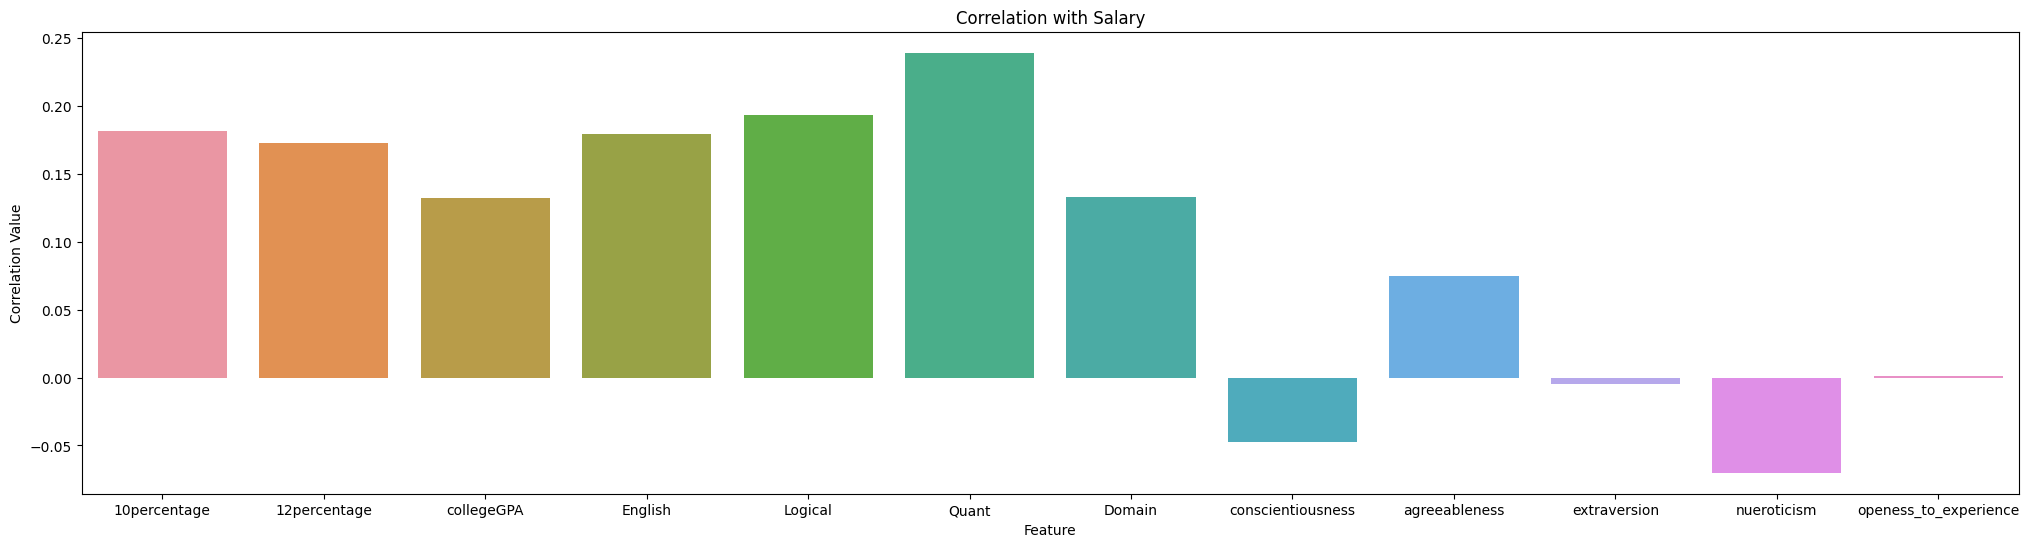

In [12]:
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt
import seaborn as sns
# assuming you have a PySpark DataFrame named 'df' with the following columns
# ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
# select relevant columns
selected_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
# calculate correlation with 'Salary' column
corr_matrix = {}
for col in selected_cols:
    corr_val = df.select(corr(col, 'Salary')).collect()[0][0]
    corr_matrix[col] = corr_val
# plot correlation values as a bar plot
fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=list(corr_matrix.keys()), y=list(corr_matrix.values()), ax=ax)
ax.set_title('Correlation with Salary')
ax.set_xlabel('Feature')
ax.set_ylabel('Correlation Value')
plt.show()


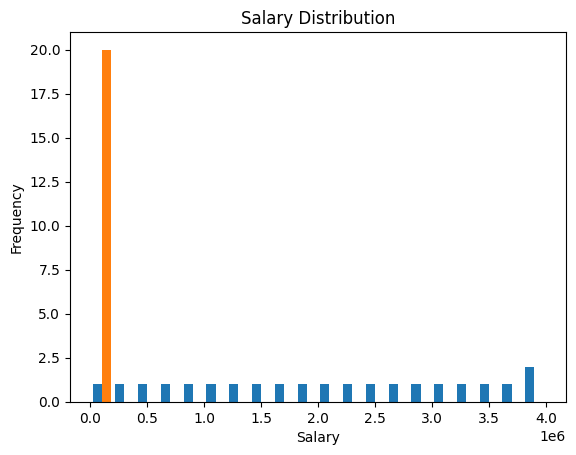

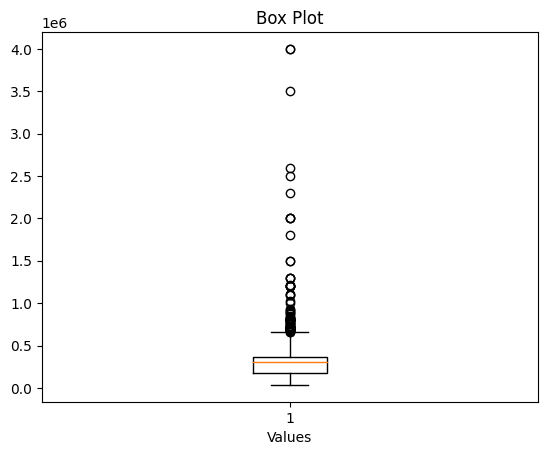

In [13]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
# assuming you have a PySpark DataFrame named 'df' with a 'salary' column
salary_histogram = df.select('salary').rdd.flatMap(lambda x: x).histogram(20)
# plotting the histogram using Matplotlib
plt.hist(salary_histogram, bins=20)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
# assuming you have a PySpark DataFrame named 'df' with a column named 'values'
values = df.select('Salary').rdd.flatMap(lambda x: x).collect()
# plotting the box plot using Matplotlib
plt.boxplot(values)
plt.title('Box Plot')
plt.xlabel('Values')
plt.show()

**Data Standardization using one hot Encoder**

In [14]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a SparkSession object
spark = SparkSession.builder.appName('LinearRegression').getOrCreate()

# Load the data into a PySpark DataFrame
data = df#spark.read.format('csv').option('header', True).load('path/to/data.csv')
# Load the data into a PySpark DataFrame and filter rows with salary<=2500000
#data = df.filter("Salary<=2500000")
# Apply one-hot encoding to the categorical variables
categorical_cols = ['Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']
for col in categorical_cols:
    string_indexer = StringIndexer(inputCol=col, outputCol=col+'_index')
    model = string_indexer.fit(data)
    data = model.transform(data)
    encoder = OneHotEncoder(inputCols=[col+'_index'], outputCols=[col+'_vec'])
    encoder_model = encoder.fit(data)
    data = encoder_model.transform(data)

# Create a vector of features using the encoded variables
feature_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
                'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
                'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness',
                'extraversion', 'nueroticism', 'openess_to_experience', 'Gender_vec', '10board_vec',
                '12board_vec', 'Degree_vec', 'Specialization_vec', 'CollegeState_vec']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
data = assembler.transform(data)


# Splitting Dataset into Train and Test Dataset and Model Fitting

In [15]:
# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=42)
# Create a linear regression model and fit it to the training data
lr = LinearRegression(featuresCol='features', labelCol='Salary')
lr_model = lr.fit(training_data)

# Make predictions on the testing data and evaluate the model
predictions = lr_model.transform(testing_data)
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Salary', metricName='rmse')


## Model Performance Evaluation

In [16]:
rmse = evaluator.evaluate(predictions)

print('Root Mean Squared Error (RMSE) on test data =', rmse)

from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the testing data and evaluate the model
predictions = lr_model.transform(testing_data)

# Evaluate model performance
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Salary')
rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

# Calculate adjusted R Square
num_features = len(feature_cols)
n = testing_data.count()
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_features - 1))

print('Root Mean Squared Error (RMSE) on test data =', rmse)
print('R Square (R2) on test data =', r2)
print('Adjusted R Square (Adj R2) on test data =', adj_r2)


Root Mean Squared Error (RMSE) on test data = 244817.26578775048
Root Mean Squared Error (RMSE) on test data = 244817.26578775048
R Square (R2) on test data = 0.056573648426837986
Adjusted R Square (Adj R2) on test data = 0.0279154967994637


Root Mean Squared Error (RMSE) on test data = 244817.26578775048
Root Mean Squared Error (RMSE) on test data = 244817.26578775048
R Square (R2) on test data = 0.056573648426837986
Adjusted R Square (Adj R2) on test data = 0.050977999840994825


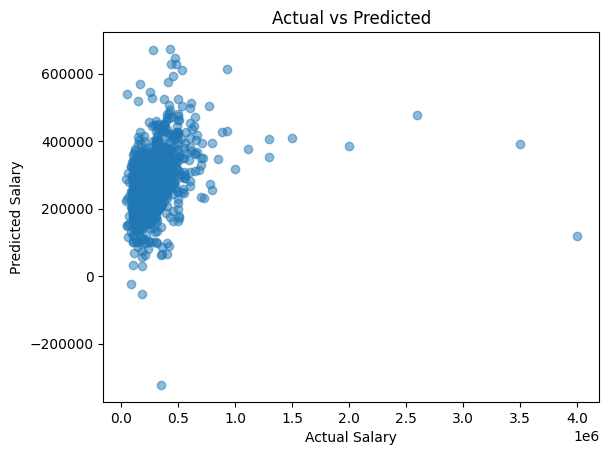

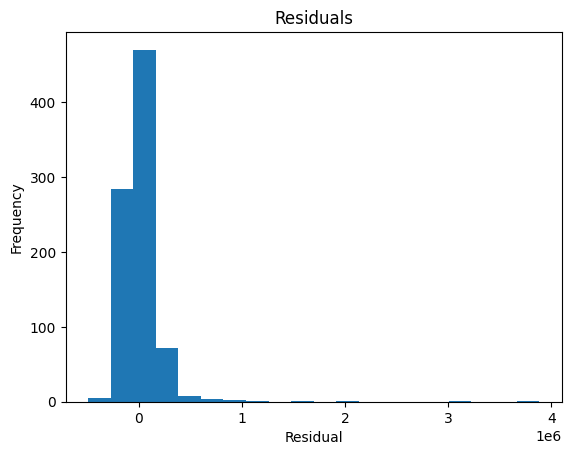

In [41]:

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=42)

# Create a linear regression model and fit it to the training data
lr = LinearRegression(featuresCol='features', labelCol='Salary')
lr_model = lr.fit(training_data)

# Make predictions on the testing data and evaluate the model
predictions = lr_model.transform(testing_data)
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Salary', metricName='rmse')
rmse = evaluator.evaluate(predictions)

print('Root Mean Squared Error (RMSE) on test data =', rmse)

from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the testing data and evaluate the model
predictions = lr_model.transform(testing_data)

# Evaluate model performance
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Salary')
rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

# Calculate adjusted R Square
num_features = len(feature_cols)
n = testing_data.count()
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_features - 1))

print('Root Mean Squared Error (RMSE) on test data =', rmse)
print('R Square (R2) on test data =', r2)
print('Adjusted R Square (Adj R2) on test data =', adj_r2)

import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the testing data and get actual and predicted values
predictions = lr_model.transform(testing_data).select('Salary', 'prediction').collect()
actual = np.array([float(row[0]) for row in predictions])
predicted = np.array([float(row[1]) for row in predictions])

# Calculate residuals
residuals = actual - predicted

# Create a scatter plot of predicted vs actual values
plt.scatter(actual, predicted, alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

# Create a histogram of residuals
plt.hist(residuals, bins=20)
plt.title('Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()




# D-Tree Model

Root Mean Squared Error (RMSE) on test data = 277366
R-squared (R2) on test data = -0.21096
Mean Absolute Error (MAE) on test data = 126496


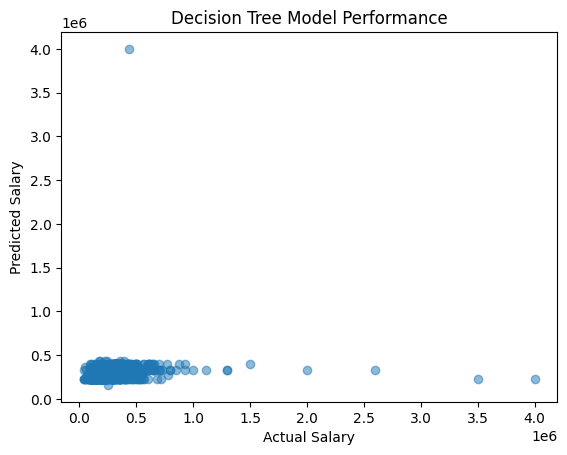

In [34]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Index categorical variables
genderIndexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
board10Indexer = StringIndexer(inputCol="10board", outputCol="10boardIndex")
board12Indexer = StringIndexer(inputCol="12board", outputCol="12boardIndex")
degreeIndexer = StringIndexer(inputCol="Degree", outputCol="DegreeIndex")
specIndexer = StringIndexer(inputCol="Specialization", outputCol="SpecIndex")
stateIndexer = StringIndexer(inputCol="CollegeState", outputCol="StateIndex")

# One-hot encode indexed categorical variables
genderEncoder = OneHotEncoder(inputCol="GenderIndex", outputCol="GenderVec")
board10Encoder = OneHotEncoder(inputCol="10boardIndex", outputCol="10boardVec")
board12Encoder = OneHotEncoder(inputCol="12boardIndex", outputCol="12boardVec")
degreeEncoder = OneHotEncoder(inputCol="DegreeIndex", outputCol="DegreeVec")
specEncoder = OneHotEncoder(inputCol="SpecIndex", outputCol="SpecVec")
stateEncoder = OneHotEncoder(inputCol="StateIndex", outputCol="StateVec")

# Create a pipeline to apply transformations to the data
pipeline = Pipeline(stages=[genderIndexer, board10Indexer, board12Indexer, degreeIndexer, specIndexer, stateIndexer,
                            genderEncoder, board10Encoder, board12Encoder, degreeEncoder, specEncoder, stateEncoder])
trainData=training_data
testData=testing_data
# Fit and transform the training data using the pipeline
transformedTrainData = pipeline.fit(trainData).transform(trainData)

# Fit and transform the test data using the pipeline
transformedTestData = pipeline.fit(testData).transform(testData)

# Create a Decision Tree regression model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Salary")

# Train the model on the transformed training data
dtModel = dt.fit(transformedTrainData)

# Make predictions on the transformed test data
dtPredictions = dtModel.transform(transformedTestData)

# Evaluate the model using RMSE
dtEvaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="rmse")
dtRMSE = dtEvaluator.evaluate(dtPredictions)

print("Root Mean Squared Error (RMSE) on test data = %g" % dtRMSE)
# Evaluate the model using RMSE, R2, and MAE
dtEvaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="rmse")
dtRMSE = dtEvaluator.evaluate(dtPredictions)

dtEvaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="r2")
dtR2 = dtEvaluator.evaluate(dtPredictions)

dtEvaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="mae")
dtMAE = dtEvaluator.evaluate(dtPredictions)

# Print the performance scores
#print("Root Mean Squared Error (RMSE) on test data = %g" % dtRMSE)
print("R-squared (R2) on test data = %g" % dtR2)
print("Mean Absolute Error (MAE) on test data = %g" % dtMAE)

import matplotlib.pyplot as plt
import numpy as np

actual = np.array(dtPredictions.select('Salary').collect())
predicted = np.array(dtPredictions.select('prediction').collect())

plt.scatter(actual, predicted, alpha=0.5)
plt.title('Decision Tree Model Performance')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()



# Random Forest Model

Root Mean Squared Error (RMSE) on test data = 246284
R-squared (R2) on test data = 0.0452391
Mean Absolute Error (MAE) on test data = 116799


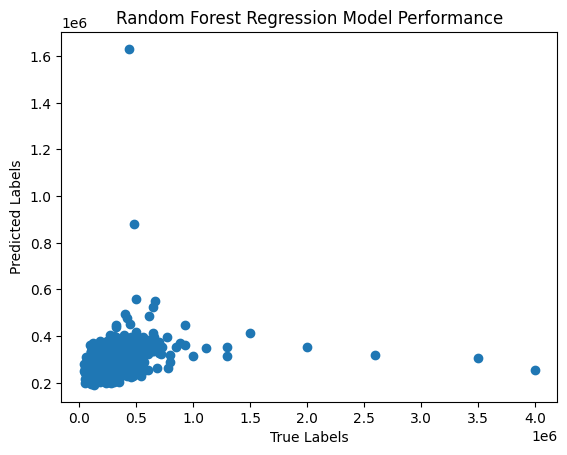

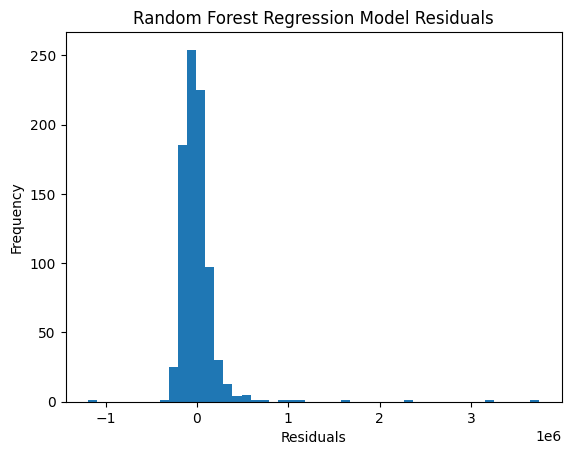

In [32]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Index categorical variables
genderIndexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
board10Indexer = StringIndexer(inputCol="10board", outputCol="10boardIndex")
board12Indexer = StringIndexer(inputCol="12board", outputCol="12boardIndex")
degreeIndexer = StringIndexer(inputCol="Degree", outputCol="DegreeIndex")
specIndexer = StringIndexer(inputCol="Specialization", outputCol="SpecIndex")
stateIndexer = StringIndexer(inputCol="CollegeState", outputCol="StateIndex")

# One-hot encode indexed categorical variables
genderEncoder = OneHotEncoder(inputCol="GenderIndex", outputCol="GenderVec")
board10Encoder = OneHotEncoder(inputCol="10boardIndex", outputCol="10boardVec")
board12Encoder = OneHotEncoder(inputCol="12boardIndex", outputCol="12boardVec")
degreeEncoder = OneHotEncoder(inputCol="DegreeIndex", outputCol="DegreeVec")
specEncoder = OneHotEncoder(inputCol="SpecIndex", outputCol="SpecVec")
stateEncoder = OneHotEncoder(inputCol="StateIndex", outputCol="StateVec")

# Create a pipeline to apply transformations to the data
pipeline = Pipeline(stages=[genderIndexer, board10Indexer, board12Indexer, degreeIndexer, specIndexer, stateIndexer,
                            genderEncoder, board10Encoder, board12Encoder, degreeEncoder, specEncoder, stateEncoder])

# Fit and transform the training data using the pipeline
transformedTrainData = pipeline.fit(trainData).transform(trainData)

# Fit and transform the test data using the pipeline
transformedTestData = pipeline.fit(testData).transform(testData)

# Create a Random Forest regression model
rf = RandomForestRegressor(featuresCol="features", labelCol="Salary")

# Train the model on the transformed training data
rfModel = rf.fit(transformedTrainData)

# Make predictions on the transformed test data
rfPredictions = rfModel.transform(transformedTestData)

# Evaluate the model using RMSE
rfEvaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="rmse")
rfRMSE = rfEvaluator.evaluate(rfPredictions)

#print("Root Mean Squared Error (RMSE) on test data = %g" % rfRMSE)

# Evaluate the model using RMSE, R-squared, and MAE
rfEvaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction")
rfRMSE = rfEvaluator.evaluate(rfPredictions, {rfEvaluator.metricName: "rmse"})
rfR2 = rfEvaluator.evaluate(rfPredictions, {rfEvaluator.metricName: "r2"})
rfMAE = rfEvaluator.evaluate(rfPredictions, {rfEvaluator.metricName: "mae"})

print("Root Mean Squared Error (RMSE) on test data = %g" % rfRMSE)
print("R-squared (R2) on test data = %g" % rfR2)
print("Mean Absolute Error (MAE) on test data = %g" % rfMAE)
import matplotlib.pyplot as plt
import numpy as np

# Extract the true and predicted labels from the test data
y_true = rfPredictions.select("Salary").rdd.flatMap(lambda x: x).collect()
y_pred = rfPredictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Create a scatter plot of the true vs predicted labels
plt.scatter(y_true, y_pred)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Random Forest Regression Model Performance")
plt.show()

# Create a histogram of the residuals
residuals = np.array(y_true) - np.array(y_pred)
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Random Forest Regression Model Residuals")
plt.show()


# Gradient Boost Model

Root Mean Squared Error (RMSE) on test data = 276148
R-squared (R2) on test data = -0.20
Mean Absolute Error (MAE) on test data = 122840


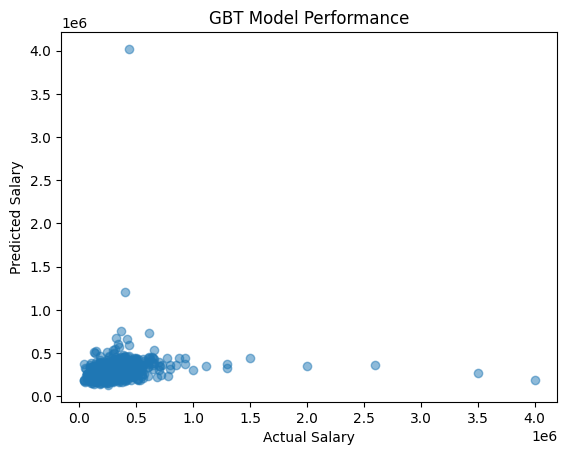

In [30]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Gradient-Boosted Trees model
gbt = GBTRegressor(featuresCol="features", labelCol="Salary", maxIter=10)

# Fit the model to the training data
gbt_model = gbt.fit(training_data)

# Make predictions on the test data
gbt_predictions = gbt_model.transform(testing_data)

# Evaluate the performance of the model on the test data
gbt_evaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="rmse")
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions)
gbt_evaluator.setMetricName("r2")
gbt_r2 = gbt_evaluator.evaluate(gbt_predictions)
gbt_evaluator.setMetricName("mae")
gbt_mae = gbt_evaluator.evaluate(gbt_predictions)

print("Root Mean Squared Error (RMSE) on test data = {:.0f}".format(gbt_rmse))
print("R-squared (R2) on test data = {:.2f}".format(gbt_r2))
print("Mean Absolute Error (MAE) on test data = {:.0f}".format(gbt_mae))
import matplotlib.pyplot as plt

# Extract the actual and predicted values from the test data
actual = gbt_predictions.select("Salary").toPandas()["Salary"]
predicted = gbt_predictions.select("prediction").toPandas()["prediction"]

# Create a scatter plot of actual vs predicted values
plt.scatter(actual, predicted, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("GBT Model Performance")
plt.show()


In [21]:
!pip install pyspark_dist_explore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# assuming you have a PySpark DataFrame named 'df' with the following columns
# ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary

# select relevant columns
selected_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']

# create a VectorAssembler to combine selected features into a single vector column
assembler = VectorAssembler(inputCols=selected_cols[:-1], outputCol='features')

# transform the DataFrame to include the 'features' column
feature_df = assembler.transform(df.select(selected_cols))

# split the data into training and test sets
(train_df, test_df) = feature_df.randomSplit([0.8, 0.2], seed=42)

# train a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='Salary')
lr_model = lr.fit(train_df)

# evaluate the model on the test set
evaluator = RegressionEvaluator(labelCol='Salary', metricName='rmse')
predictions = lr_model.transform(test_df)
rmse = evaluator.evaluate(predictions)

# print the RMSE of the model
print('RMSE: ', rmse)


RMSE:  207609.91769422244


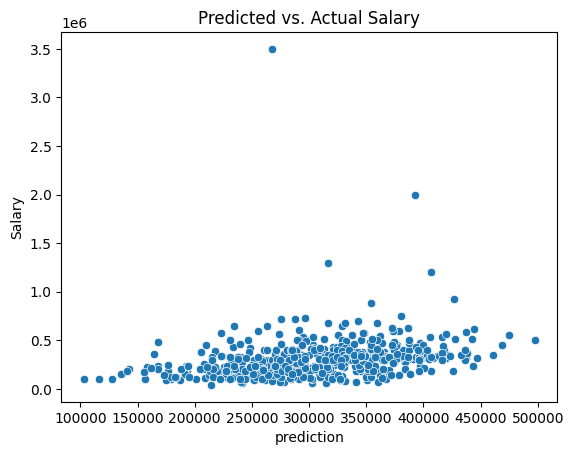

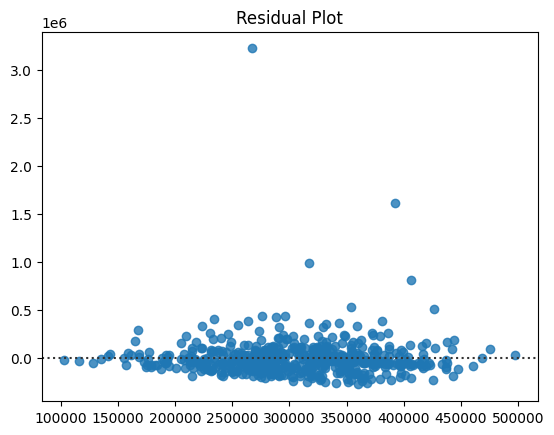

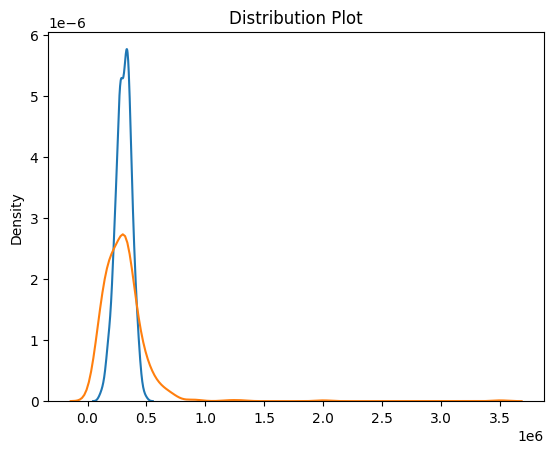

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# assuming you have a PySpark DataFrame named 'df' with the following columns
# ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary

# select relevant columns
selected_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']

# create a VectorAssembler to combine selected features into a single vector column
assembler = VectorAssembler(inputCols=selected_cols[:-1], outputCol='features')

# transform the DataFrame to include the 'features' column
feature_df = assembler.transform(df.select(selected_cols))

# split the data into training and test sets
(train_df, test_df) = feature_df.randomSplit([0.8, 0.2], seed=42)

# train a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='Salary')
lr_model = lr.fit(train_df)

# make predictions on the test set
predictions = lr_model.transform(test_df)

# create a scatter plot of predicted vs. actual values
sns.scatterplot(x='prediction', y='Salary', data=predictions.toPandas())
plt.title('Predicted vs. Actual Salary')
plt.show()

# create a residual plot
residuals = predictions.select('Salary', 'prediction').rdd.map(lambda x: x[0] - x[1]).collect()
sns.residplot(x=predictions.select('prediction').rdd.map(lambda x: x[0]).collect(), y=residuals)
plt.title('Residual Plot')
plt.show()

# create a distribution plot of predicted vs. actual values
sns.kdeplot(predictions.select('prediction').rdd.map(lambda x: x[0]).collect(), label='Predicted')
sns.kdeplot(predictions.select('Salary').rdd.map(lambda x:x[0]).collect(), label='Actual')
plt.title('Distribution Plot')
plt.show()


In [24]:
from pyspark.ml.evaluation import RegressionEvaluator

# assuming 'predictions' DataFrame already contains the predictions made by the model

# create a RegressionEvaluator object to compute the evaluation metrics
evaluator = RegressionEvaluator(labelCol='Salary', predictionCol='prediction', metricName='rmse')

# compute the root mean squared error (RMSE) on the predictions
rmse = evaluator.evaluate(predictions)

# print the RMSE
print('RMSE:', rmse)

# compute the R-squared (coefficient of determination) on the predictions
r2 = lr_model.summary.r2

# print the R-squared
print('R-squared:', r2)


RMSE: 207609.91769422244
R-squared: 0.09890385871326934


In [37]:
# create a dataframe with the input data for prediction
input_data = [(9.5, 'central', 1, 2, 'science')]
input_df = spark.createDataFrame(input_data, ['cgpa', 'board', 'tier', 'location', 'specialization'])

# create a vector of features for input dataframe
assembler = VectorAssembler(inputCols=['cgpa', 'board', 'tier', 'location', 'specialization'], outputCol='features')
input_df = assembler.transform(input_df)

# use the chosen model to make the prediction
predictions = lr_model.transform(input_df)

# extract the predicted salary from the predictions dataframe
predicted_salary = predictions.select('prediction').collect()[0][0]

print('Predicted salary for the graduate student:', predicted_salary)


IllegalArgumentException: ignored